In [79]:
import matplotlib.pyplot as plt
import pandas as pd
import shared_utils
from scipy.stats import zscore
import seaborn as sns
import numpy as np

# set_option to increase max rows displayed to 200, to see entire df in 1 go/
pd.set_option("display.max_rows", 200)

## Read in cost per bus data

In [12]:
# FTA Grant Award Press Release Data
fta = pd.read_csv('gs://calitp-analytics-data/data-analyses/bus_procurement_cost/fta_cost_per_bus.csv')

In [13]:
# TIRCP Project Tracking Data 
tircp = pd.read_csv('gs://calitp-analytics-data/data-analyses/bus_procurement_cost/tircp_project_cost_per_bus.csv')

## Dataset cleaning

In [14]:
# peaking into each dataset
data=[fta, tircp]

for x in data:
    display(x.shape,
           x.columns,
           x.dtypes,
           x.head())

(95, 5)

Index(['Unnamed: 0', 'project_sponsor', 'funding', 'bus_count',
       'cost_per_bus'],
      dtype='object')

Unnamed: 0          int64
project_sponsor    object
funding             int64
bus_count           int64
cost_per_bus        int64
dtype: object

,Unnamed: 0,project_sponsor,funding,bus_count,cost_per_bus
0,0,AUTORIDAD METROPOLITANA DE AUTOBUSES (PRMBA),10000000,8,1250000
1,1,Alameda-Contra Costa Transit District,25513684,25,1020547
2,2,Berkshire Regional Transit Authority,2212747,2,1106373
3,3,Brazos Transit District,9650646,11,877331
4,4,Cape Fear Public Transportation Authority,2860250,5,572050


(30, 5)

Index(['Unnamed: 0', 'grant_recipient', 'bus_count', 'tircp_award_amount_($)',
       'cost_per_bus'],
      dtype='object')

Unnamed: 0                  int64
grant_recipient            object
bus_count                 float64
tircp_award_amount_($)      int64
cost_per_bus                int64
dtype: object

,Unnamed: 0,grant_recipient,bus_count,tircp_award_amount_($),cost_per_bus
0,0,Anaheim Transportation Network (ATN),65.0,51395000,790692
1,1,Antelope Valley Transit Authority (AVTA),36.0,35735000,992638
2,2,Antelope Valley Transit Authority (AVTA) & Lon...,7.0,13156000,1879428
3,3,City of Fresno,6.0,7798000,1299666
4,4,City of Glendale and Arroyo Verdugo Communities,27.0,34648000,1283259


In [21]:
#look to drop column from each df
data=[fta, tircp]

for x in data:
    x.drop('Unnamed: 0', axis=1, inplace=True)

In [24]:
display(fta.columns,
tircp.columns)

Index(['project_sponsor', 'funding', 'bus_count', 'cost_per_bus'], dtype='object')

Index(['grant_recipient', 'bus_count', 'tircp_award_amount_($)',
       'cost_per_bus'],
      dtype='object')

### reorder columns

In [28]:
new_order =['grant_recipient',
              'tircp_award_amount_($)',
              'bus_count',
              'cost_per_bus']
tircp = tircp[new_order]

### rename columns to match eachother

In [37]:
new_col =['project_sponsor', 'funding', 'bus_count', 'cost_per_bus']

tircp.columns=new_col

In [38]:
display(list(fta.columns),
list(tircp.columns))

['project_sponsor', 'funding', 'bus_count', 'cost_per_bus']

['project_sponsor', 'funding', 'bus_count', 'cost_per_bus']

In [48]:
# add new col to identify source
fta['source']='fta'
tircp['source']='tircp_project_tracking'

/tmp/ipykernel_484/1517998735.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tircp['source']='tircp_project_tracking'


In [49]:
display(fta.head(),tircp.head())

,project_sponsor,funding,bus_count,cost_per_bus,source
0,AUTORIDAD METROPOLITANA DE AUTOBUSES (PRMBA),10000000,8,1250000,fta
1,Alameda-Contra Costa Transit District,25513684,25,1020547,fta
2,Berkshire Regional Transit Authority,2212747,2,1106373,fta
3,Brazos Transit District,9650646,11,877331,fta
4,Cape Fear Public Transportation Authority,2860250,5,572050,fta


,project_sponsor,funding,bus_count,cost_per_bus,source
0,Anaheim Transportation Network (ATN),51395000,65.0,790692,tircp_project_tracking
1,Antelope Valley Transit Authority (AVTA),35735000,36.0,992638,tircp_project_tracking
2,Antelope Valley Transit Authority (AVTA) & Lon...,13156000,7.0,1879428,tircp_project_tracking
3,City of Fresno,7798000,6.0,1299666,tircp_project_tracking
4,City of Glendale and Arroyo Verdugo Communities,34648000,27.0,1283259,tircp_project_tracking


### Concat both dataframes

In [50]:
concat = pd.concat([fta,tircp], axis=0).reset_index()

In [51]:
concat = concat.drop('index', axis=1)

In [52]:
concat

,project_sponsor,funding,bus_count,cost_per_bus,source
0,AUTORIDAD METROPOLITANA DE AUTOBUSES (PRMBA),10000000,8.0,1250000,fta
1,Alameda-Contra Costa Transit District,25513684,25.0,1020547,fta
2,Berkshire Regional Transit Authority,2212747,2.0,1106373,fta
3,Brazos Transit District,9650646,11.0,877331,fta
4,Cape Fear Public Transportation Authority,2860250,5.0,572050,fta
5,Central Oklahoma Transportation and Parking Au...,4278772,9.0,475419,fta
6,Champaign-Urbana Mass Transit District,6635394,10.0,663539,fta
7,Charleston Area Regional Transportation Authority,25906730,7.0,3700961,fta
8,City Of Tallahassee,20370793,8.0,2546349,fta
9,City of Albuquerque,18262255,20.0,913112,fta


In [55]:
list(concat.project_sponsor.sort_values().unique())

['AUTORIDAD METROPOLITANA DE AUTOBUSES (PRMBA)',
 'Alameda-Contra Costa Transit District',
 'Anaheim Transportation Network (ATN)',
 'Antelope Valley Transit Authority (AVTA)',
 'Antelope Valley Transit Authority (AVTA) & Long Beach Transit (LBT)',
 'Berkshire Regional Transit Authority',
 'Brazos Transit District',
 'Cape Fear Public Transportation Authority',
 'Central Oklahoma Transportation and Parking Authority (COTPA), dba EMBARK',
 'Champaign-Urbana Mass Transit District',
 'Charleston Area Regional Transportation Authority',
 'City Of Tallahassee',
 'City of Albuquerque',
 'City of Alexandria',
 'City of Anaheim',
 'City of Beaumont',
 'City of Beloit',
 'City of Brownsville',
 'City of Charlotte - Charlotte Area Transit System',
 'City of Colorado Springs dba Mountain Metropolitan Transit',
 'City of Dubuque',
 'City of Fresno',
 'City of Glendale and Arroyo Verdugo Communities',
 'City of Hattiesburg',
 'City of Iowa City',
 'City of Jonesboro, Arkansas',
 'City of Los Angele

## Export concat data

In [59]:
concat.to_csv('gs://calitp-analytics-data/data-analyses/bus_procurement_cost/fta_tircp_concat.csv')

## Stats Analysis

In [61]:
concat.head()

,project_sponsor,funding,bus_count,cost_per_bus,source
0,AUTORIDAD METROPOLITANA DE AUTOBUSES (PRMBA),10000000,8.0,1250000,fta
1,Alameda-Contra Costa Transit District,25513684,25.0,1020547,fta
2,Berkshire Regional Transit Authority,2212747,2.0,1106373,fta
3,Brazos Transit District,9650646,11.0,877331,fta
4,Cape Fear Public Transportation Authority,2860250,5.0,572050,fta


In [67]:
# add new column for z-score
concat['zscore_' + 'cost_per_bus'] = zscore(concat['cost_per_bus'])

In [83]:
concat.shape

(125, 7)

In [82]:
# remove outliers
#filter df for zscores =>-3<=3
filtered = concat[(concat['zscore_cost_per_bus'] >= -3) & (concat['zscore_cost_per_bus'] <=3)]

In [84]:
# 2 rows were dropped
filtered.shape

(123, 7)

In [85]:
mean = np.mean(filtered['cost_per_bus'])
std_dev = np.std(filtered['cost_per_bus'])

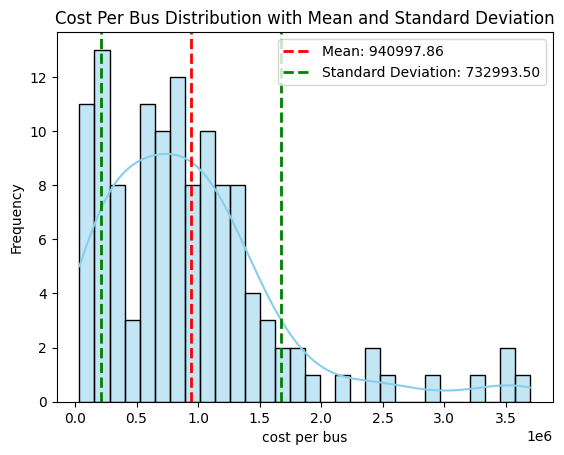

In [86]:
sns.histplot(filtered['cost_per_bus'], kde=True, color='skyblue', bins=30)
plt.axvline(mean, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean:.2f}')
plt.axvline(mean + std_dev, color='green', linestyle='dashed', linewidth=2, label=f'Standard Deviation: {std_dev:.2f}')
plt.axvline(mean - std_dev, color='green', linestyle='dashed', linewidth=2)

plt.title('Cost Per Bus Distribution with Mean and Standard Deviation')
plt.xlabel('cost per bus')
plt.ylabel('Frequency')
plt.legend()
plt.show()